In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
dfb = pd.read_csv("E:\\LEARNBAY\\Project - Jan\\march\\boston.csv")
dfb.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
dfb.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
dfb.shape

(506, 14)

In [6]:
dfb.describe()


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


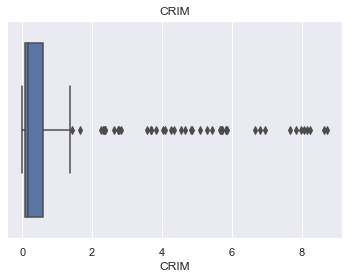

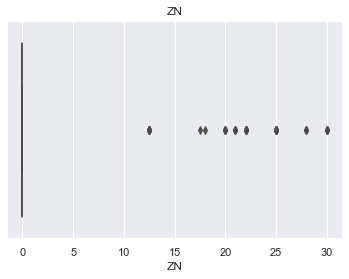

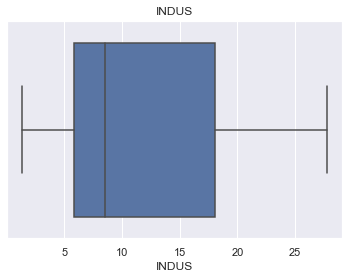

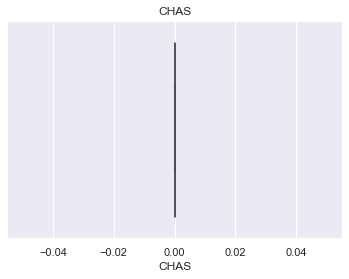

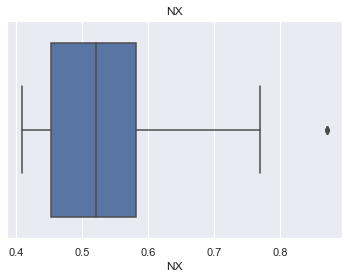

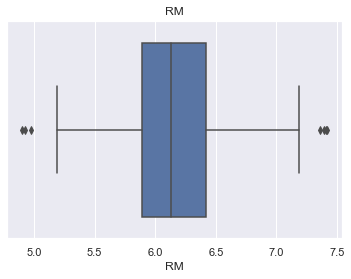

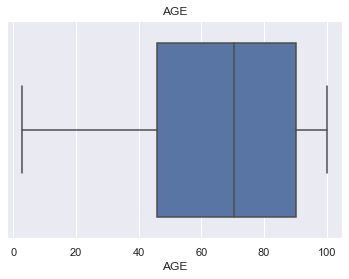

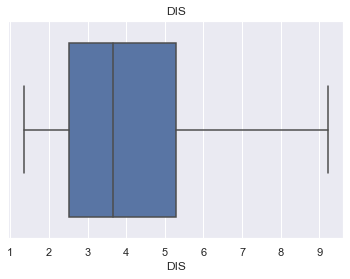

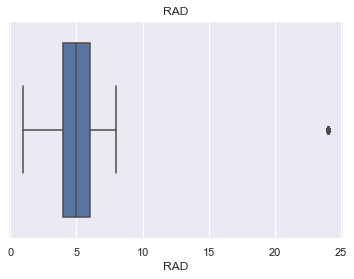

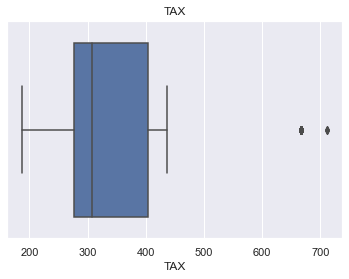

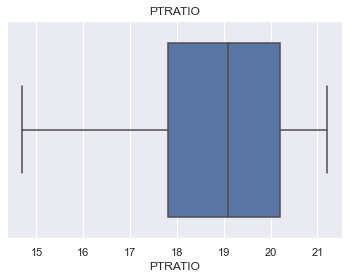

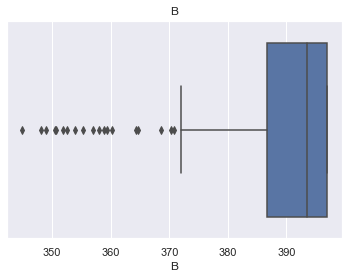

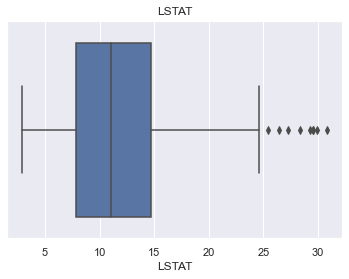

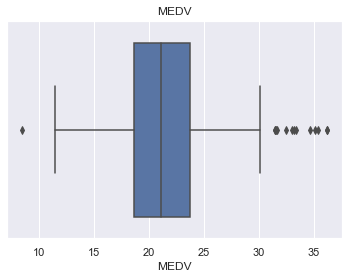

In [11]:
for i in dfb.columns:
    plt.figure()
    sns.boxplot(dfb[i])
    plt.title(i)

In [9]:
Q1 = dfb.quantile(0.25)
Q3 = dfb.quantile(0.75)
IQR = Q3-Q1
pos = Q3 + 1.5*IQR
neg = Q1 - 1.5*IQR

In [10]:
dfb = dfb[~(((dfb > pos)|(dfb<neg))).any(axis = 1)]
dfb.shape

(268, 14)

In [12]:
dfb.corr()


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.210341,0.494892,NaN,0.616244,-0.055495,0.349502,-0.386631,0.896524,0.799501,0.236846,-0.112067,0.313103,-0.324550
ZN,-0.210341,1.000000,-0.318908,NaN,-0.407341,0.145068,-0.317293,0.602665,-0.104204,-0.240486,-0.233578,0.051526,-0.216148,0.165544
INDUS,0.494892,-0.318908,1.000000,NaN,0.687050,-0.227952,0.479729,-0.627017,0.413444,0.605088,0.251323,-0.165349,0.484326,-0.421494
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NX,0.616244,-0.407341,0.687050,NaN,1.000000,-0.253273,0.625244,-0.715439,0.475386,0.601246,0.105761,-0.181690,0.522128,-0.425889
RM,-0.055495,0.145068,-0.227952,NaN,-0.253273,1.000000,-0.142963,0.165074,0.035247,-0.061476,-0.015428,0.126908,-0.625223,0.644819
AGE,0.349502,-0.317293,0.479729,NaN,0.625244,-0.142963,1.000000,-0.607353,0.224189,0.363663,0.185346,-0.088601,0.567426,-0.467925
DIS,-0.386631,0.602665,-0.627017,NaN,-0.715439,0.165074,-0.607353,1.000000,-0.254432,-0.440637,-0.200926,0.077007,-0.384235,0.263073
RAD,0.896524,-0.104204,0.413444,NaN,0.475386,0.035247,0.224189,-0.254432,1.000000,0.852483,0.283171,-0.073357,0.178373,-0.188320
TAX,0.799501,-0.240486,0.605088,NaN,0.601246,-0.061476,0.363663,-0.440637,0.852483,1.000000,0.315250,-0.089440,0.298730,-0.357251


<AxesSubplot:>

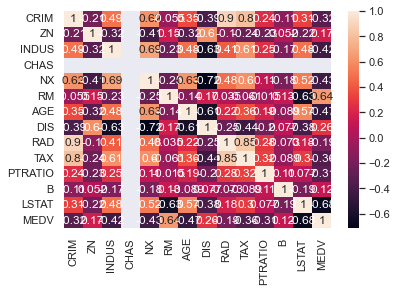

In [13]:
sns.heatmap(dfb.corr(),annot=True)

In [16]:
xb = dfb.drop(['MEDV'],axis=1)
yb = dfb['MEDV']

In [17]:
print(xb.shape,yb.shape)

(268, 13) (268,)


In [21]:
#VIF Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

data=xb
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(data,i) 
             for i in range(data.shape[1])]

vif['Features'] = data.columns
vif

,VIF,Features
0,8.818406,CRIM
1,2.027880,ZN
2,10.019997,INDUS
3,NaN,CHAS
4,103.970273,NX
5,309.172626,RM
6,16.742082,AGE
7,19.226934,DIS
8,19.506998,RAD
9,41.628523,TAX


In [24]:
from sklearn.preprocessing import StandardScaler

sclr = StandardScaler()
x_sclr = sclr.fit_transform(xb)
x_sclr

array([[-0.51902211,  1.62124973, -1.31896045, ..., -2.00440305,
         0.7037701 , -1.29533293],
       [-0.5082986 , -0.45463844, -0.56751391, ..., -0.57375424,
         0.7037701 , -0.52479164],
       [-0.50830882, -0.45463844, -0.56751391, ..., -0.57375424,
         0.3374944 , -1.47129789],
       ...,
       [-0.49120945, -0.45463844,  0.19971933, ...,  1.25747625,
         0.7037701 , -1.17308359],
       [-0.46626286, -0.45463844,  0.19971933, ...,  1.25747625,
         0.3932907 , -1.01749352],
       [-0.49802978, -0.45463844,  0.19971933, ...,  1.25747625,
         0.7037701 , -0.75817674]])

In [25]:
#SPliting of the data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(xb,yb,test_size=0.2,random_state= 21)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(214, 13) (54, 13) (214,) (54,)


# Building Regression Model

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

lr_pred = lr.predict(x_test)


In [30]:
from sklearn.metrics import r2_score

score = r2_score(y_test,lr_pred)
score

0.7076235929468601

# BUilding OLS MODEL

In [33]:
from statsmodels.regression.linear_model import OLS
# from statsmodels.regression.linear_model import OLS

import statsmodels.regression.linear_model as srlm



In [35]:
reg_model = srlm.OLS(endog = y_train,exog = x_train).fit()
re_pred = reg_model.predict(x_test)
r2_score(y_test,re_pred)

0.7036587465444023

In [36]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1277.
Date:                Sun, 19 Mar 2023   Prob (F-statistic):                   3.44e-183
Time:                        15:43:11   Log-Likelihood:                         -496.93
No. Observations:                 214   AIC:                                      1018.
Df Residuals:                     202   BIC:                                      1058.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.9433      0.229     -4.112      0.000      -1.396      -0.491
ZN            -0.0299      0.026     -1.138      0.256      -0.082       0.022
INDUS         -0.0139      0.043     -0.324      0.746      -0.098       0.070
CHAS       -4.064e-15   8.17e-15     -0.497      0.620   -2.02e-14    1.21e-14
NX            -0.3213      3.258     -0.099      0.922      -6.745       6.102
RM             5.5885      0.490     11.397      0.000       4.622       6.555
AGE           -0.0495      0.010     -5.040      0.000      -0.069      -0.030
DIS           -0.6058      0.174     -3.472      0.001      -0.950      -0.262
RAD            0.4232      0.079      5.344      0.000       0.267       0.579
TAX           -0.0134      0.003     -4.643      0.000      -0.019      -0.008
PTRATIO       -0.6516      0.107     -6.068      0.000      -0.863      -0.440
B              0.0237      0.010      2.391      0.018       0.004       0.043
LSTAT         -0.0914      0.051     -1.805      0.073      -0.191       0.008
==============================================================================
Omnibus:                        9.039   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               11.849
Skew:                           0.302   Prob(JB):                      0.00267
Kurtosis:                       3.982   Cond. No.                     2.45e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.06e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

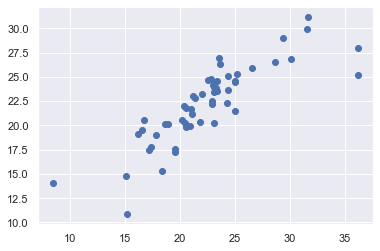

In [39]:
#TO check Normality 

plt.scatter(y_test,lr_pred)

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

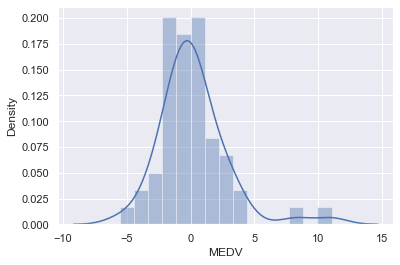

In [41]:
#to check the residual plot - whether it is normal

sns.distplot(y_test - lr_pred)

In [42]:
#Regularization 

from sklearn.linear_model import Ridge, Lasso, ElasticNet


In [43]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
r_pred = ridge.predict(x_test)
r2_score(y_test,r_pred)

0.708065622265436

In [45]:
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train,y_train)
l_pred=lasso.predict(x_test)
r2_score(y_test,l_pred)

0.6999623829370084

In [47]:
esl = ElasticNet(alpha=0.1)
esl.fit(x_train,y_train)
e_pred = esl.predict(x_test)
r2_score(y_test,e_pred)

0.6891452225110354

In [50]:
from sklearn import metrics

# MSE,RMSE,MAE,MAPE
print("MSE",metrics.mean_squared_error(y_test,lr_pred))
print("***********"*5)
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))
print("***********"*5)
print("MAE",metrics.mean_absolute_error(y_test,lr_pred))
print("***********"*5)
print("MAPE",metrics.mean_absolute_percentage_error(y_test,lr_pred))


MSE 7.186043575685801
*******************************************************
RMSE 2.6806796853943218
*******************************************************
MAE 1.8127233821453514
*******************************************************
MAPE 0.08661976803673561


# DONE